**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# I. Perkenalan

### Milestones 1 - P2

- Name   : Nabila Edelliana Khairunnisa
- Batch  : 011

### Description
Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program Phase 2 khususnya pada Artificial Neural Network.

Data yang di olah merupakan data tentang customer churn beserta atributnya dengan keterangan sebagai berikut.
- customerID: Unique ID of each customer
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharge: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer


### Objective
1. Mampu memahami konsep Artificial Neural Network.
2. Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
3. Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
4. Mampu menganalisis dan menjelaskan layer yang dibuat.

### Problem Statement
1. Manakah API terbaik untuk pemodeland dataset ini? Sequential atau Functional?
2. Bagaimanakah hasil dari model improvement?
3. Bagaimana kualitas model untuk dataset ini?
4. Bagaimana upaya yang lebih tepat untuk pemodelan ini agar perusahaan dapat meminimalisir kerugian akibat kesalahan prediksi?

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

# II. Import Pustaka yang Dibutuhkan

In [1]:
# Library EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import scipy.stats as stats
import warnings

# Library pre-processing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTENC
import warnings

# Library Model ANN
from tensorflow.keras.models import Sequential, Model
from tensorflow import keras
from keras.layers import Dense , Input , Dropout, BatchNormalization, LeakyReLU, ELU

# Library Evaluasi Model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

# Library Saving dan Open Model
import pickle

# III. Data Loading

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')
# Menampilkan head data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Menampilkan tail data
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
# Membuat salinan data untuk backup
data_copy = data.copy()

In [5]:
# mengecek ukuran dataset
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


dataset ini terdiri dari kolom-kolom bertipe numerik dan kategorikal. Terdapat kolom numerik yang tipenya object. Saya akan ubah tipenya ke numerik karena ini penting untuk analisis.

In [7]:
# data.TotalCharges = data.TotalCharges.astype("float64")

saat saya akan mengubah tipe kolom TotalCharges dari object ke float64, terdapat error "ValueError: could not convert string to float:". Hal ini cukup mencurigakan karena seharusnya jika isiya numerik, bisa diubah tipe datanya. Akan saya eksplor lagi di part selanjutnya.

# IV. Exploratory Data Analysis (EDA)

## 4.1. Melihat missing value

In [8]:
# Melihat data yang memiliki missing value
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada missing values, tapi saya curiga karena di data TotalCharges terdapat string yang tidak dapat diubah ke tipe float. Saya akan melihat unique valuesnya terlebih dahulu.

In [9]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 4.2. Melihat unique values

In [10]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

Ternyata benar dugaan saya, ada missing values yang tidak terdeteksi. saya akan ganti data tersebut dengan NaN.

In [12]:
# Assign missing values ke jenis yang dapat dibaca sistem
data['TotalCharges'] = data["TotalCharges"].replace(" ", np.nan)

In [13]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# mengecek persentase missing values
11/7043*100

0.1561834445548772

In [15]:
# menyalin data lagi untuk berjaga-jaga
df_new = data.copy()
df_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Banyaknya missing values sangat kecil, di bawah 1%. Saya akan drop missing values agar analisis dan proses selanjutnya lebih baik.

In [16]:
# membuang missing values
df_new.dropna(inplace=True)
df_new.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df_new.TotalCharges = df_new.TotalCharges.astype("float64")

## 4.3. Melihat korelasi setiap kolom dengan target (Churn)

korelasi di setiap kolom akan dilihat dari :
1. Distribusi data kolom tersebut dengan kolom target dengan grafik.
2. Chi-Square test.
    dilakukan dengan hypothesis testing dengan rules :
    - H0: tidak ada korelasi antara kolom dan kolom target
    - H1: ada korelasi antara kolom dan kolom target
    - P-Val < alpha (0.05) --> berhasil menolak H0
    - P-Val >= alpha (0.05) --> gagal menolak H0 --> kemungkinan ada korelasi --> masukkan kolom ke pemodelan

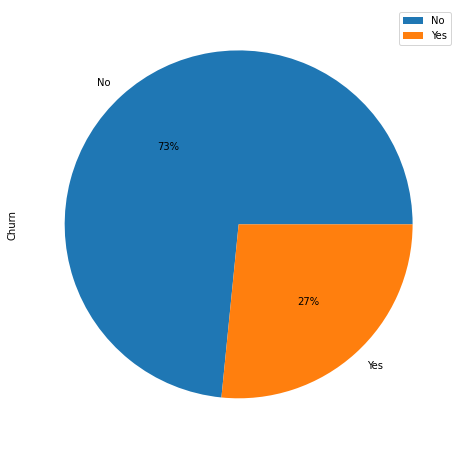

In [18]:
# Menampilkan persentase data rain tomorrow
df_new['Churn'].value_counts().plot(kind='pie',legend=True,autopct='%1.0f%%', figsize=(15,8))

terdapat imbalance pada data yaitu sebesar 73% adalah not churn dan 22% adalah churn. Nantinya akan saya akan mencoba handling handling imbalance data ini dengan SMOTE-NC (karena targetnya berupa data kategorikal) yang bisa jadi dapat mengimprove performance model.

In [19]:
df_new.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
df_new_ = df_new.copy()

### 4.3.1. :Melihat korelasi kolom kategorikal dan target dengan grafik

In [21]:
# membuat list kolom kategorikal
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

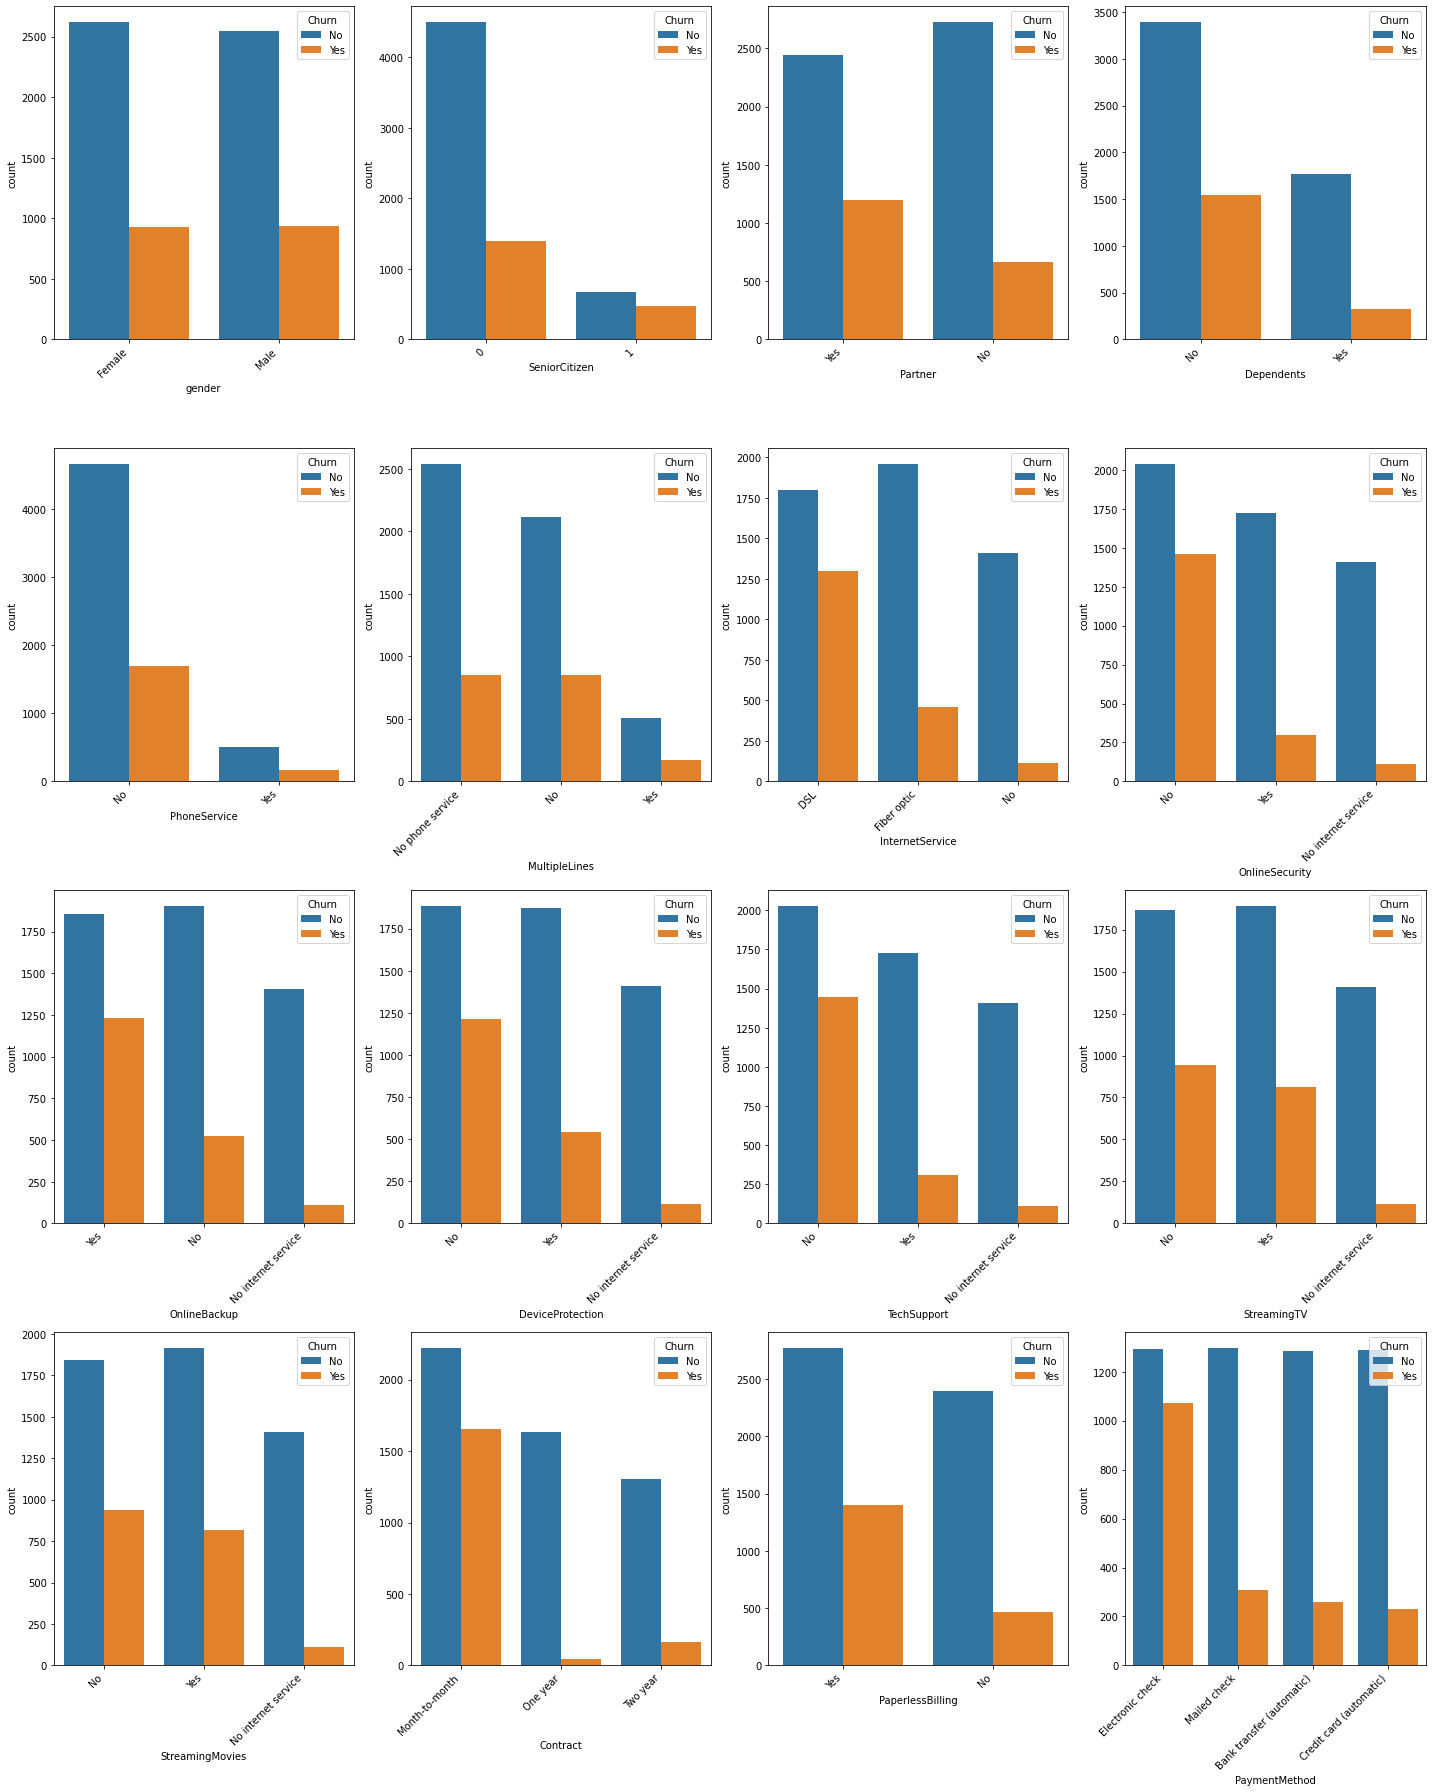

In [22]:
fig, axes = plt.subplots(4,4, figsize = (20,25))

axes = np.ravel(axes)
for i in range(len(categorical_columns)):
    sns.countplot(data = df_new, x = categorical_columns[i], ax = axes[i], hue='Churn', order = df_new[categorical_columns[i]].value_counts().index)
    axes[i].set_xticklabels(labels = df_new[categorical_columns[i]].unique(), rotation=45, ha='right')
axes = np.reshape(axes, (4,4))
plt.tight_layout()

**Gender** :
- Proporsi gender antara Male dan Female seimbang.
- Kebanyakan customer baik gender Male dan Female adalah not churn.
- Pattern distribusi churn/not churn pada kedua gender sama sehingga menunjukkan *`tidak ada korelasi antara gender dan churn`*.

**SeniorCitizen** :
- Customer mayoritas adalah merupakan customer non-senior atau customer di usia muda yaitu usia <65 tahun.
- Terdapat pattern menarik dimana customer dengan usia >65 tahun (senior) memiliki kemungkinan yang lebih kecil untuk churn sehingga hal ini mengindikasikan *`adanya korelasi SeniorCitizen dengan Churn`*.

**Partner**
- Proporsi customer antara yang memiliki partner dan tidak memiliki partner hampir seimbang.
-  Terdapat pattern menarik dimana customer yang memiliki partner memiliki kemungkinan lebih besar untuk churn sehingga hal ini mengindikasikan *`adanya korelasi Partner dengan Churn`*.

**Dependents**
- Customer mayoritas adalah merupakan customer yang memiliki dependents.
- Terdapat pattern menarik dimana customer yang memiliki dependents memiliki kemungkinan lebih kecil untuk churn sehingga hal ini mengindikasikan *`adanya korelasi Dependents dengan Churn`*.

**Phone Service**
- Customer mayoritas adalah merupakan customer yang tidak memiliki phone service.
- Terdapat pattern menarik dimana customer yang tidak memiliki phone service memiliki kemungkinan lebih besar untuk churn sehingga hal ini mengindikasikan *`adanya korelasi PhoneService dengan Churn`*.

**Multiple Lines**
- Distribusi customer berdasarkan MultipleLines paling banyak adalah customer dengan No phone service.
- Pattern distirbusi churn dan not churn antara customer dengan multiple lines no phone service dan multiple lines no hampir sama sehingga hal ini mengindikasikan *`tidak adanya korelasi antara MultipleLines dan Churn`*. Selain itu kolom ini memiliki value yang sama dan berhubungan dengan phone service sehingga *`tidak independen dan tidak cocok digunakan sebagai fitur pemodelan`*.

**Internet Service**
- Distribusi jenis internet service provider customer tersebar cukup merata antara DSL, Fiber Optic, dan No.
- Terdapat pattern menarik dimana customer dengan jenis insternet service provider DSL memiliki kemungkinan terbesar untuk churn dan kemungkinan terkecilnya ada pada jenis no. Hal ini mengindikasikan *`adanya korelasi antara InternetService dan Churn`*.

**Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies**
- Kolom-kolom ini memiliki value yang membuatnya menjadi bersifat dependent yaitu "no internet service" sehingga *`kolom ini tidak cocok digunakan sebagai fitur pemodelan`*.

**Contract**
- Distribusi jenis contract customer tersebar cukup merata antara Month-to-month, one year, dan two year.
- Akan tetapi customer dengan contract Month-to-month memiliki probabilitas jauh lebih besar untuk churn.
- Customer dengan masa contract yang lebih lama (annual/2 tahun) cenderung mengurangi keputusan mereka untuk churn/not churn karena apapun yang terjadi (misal service buruk), customer ini akan tetap berlangganan setidaknya sampai masa kontraknya habis.
- *`Hal ini mengindikasikan adanya korelasi antara Contract dan Churn`*.

**Paperless Billing**
- Distribusi jenis Paperless Billing customer not churn tersebar cukup merata antara yes dan no.
- Terdapat pattern menarik dimana customer dengan paperless billing memiliki probabilitas lebih tinggi untuk churn. Asumsi saya adalah customer kita secara psikologis merasa bahwa pengeluaran mereka untuk telco banyak karena cukup mudah untuk mengecek dan memanage billing secara paperless sehingga mendorong mereka mengambil keputusan untuk churn.
- *`Hal ini mengindikasikan adanya korelasi antara PaperlessBilling dan Churn`*.

**Payment Method**
- Distribusi jenis Payment Method customer not churn tersebar cukup merata antara Electric Check, Mailed Check, and automatic (bank transfer & credit card).
- Asumsi saya adalah customer banyak yang churn jika payment methodnya Electric Check karena metode ini tidak praktis sedangkan metode payment automatic seperti bank transfer dan credit card memiliki kemungkinan customer churn yang kecil karena metode ini lebih praktis. Customer menyukai metode payment yang praktis.
- *`Hal ini mengindikasikan adanya korelasi antara PaymentMethod dan Churn`*.

### 4.3.2. Melihat korelasi kolom numerikal dan target dengan grafik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

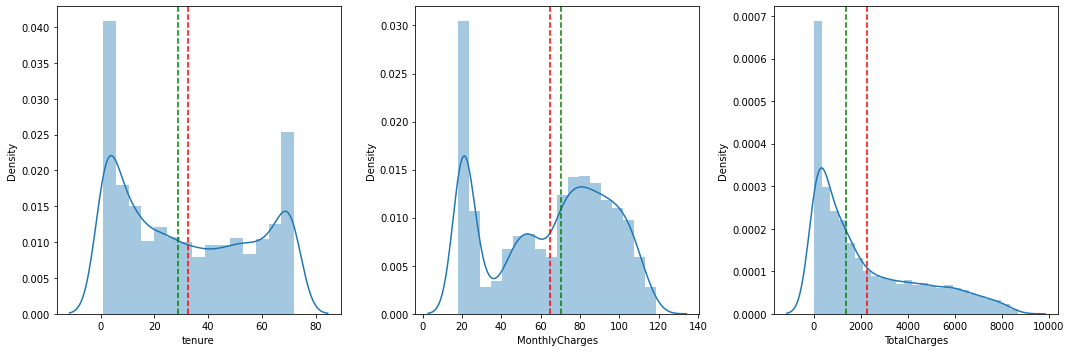

In [23]:
# membuat list kolom numerikal
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# membuat fungsi untuk menampilkan grafik displot
def distplot(df, col, axes):
    sns.distplot(df[col], ax = axes)
    axes.axvline(df[col].mean(), linestyle = '--', color = "red")
    axes.axvline(df[col].median(), linestyle = '--', color = "green")

fig, axes = plt.subplots(1,3, figsize = (15,5))

# menampilkan distplot tiap kolom numerik untuk analisis korelasi
axes = np.ravel(axes)
for i in range(len(numeric_columns)):
    distplot(df_new, numeric_columns[i], axes[i])
for i in range(len(numeric_columns), 1*3):
    axes[i].axis("off")
axes = np.reshape(axes, (1, 3))
plt.tight_layout()
plt.show()

- Apabila dilihat sepintas, dataset ini skewed untuk kolom TotalCharges.
- Distribusi tenure dan MonthlyCharges cukup merata

Saya akan melihat korelasi antar-kolom.

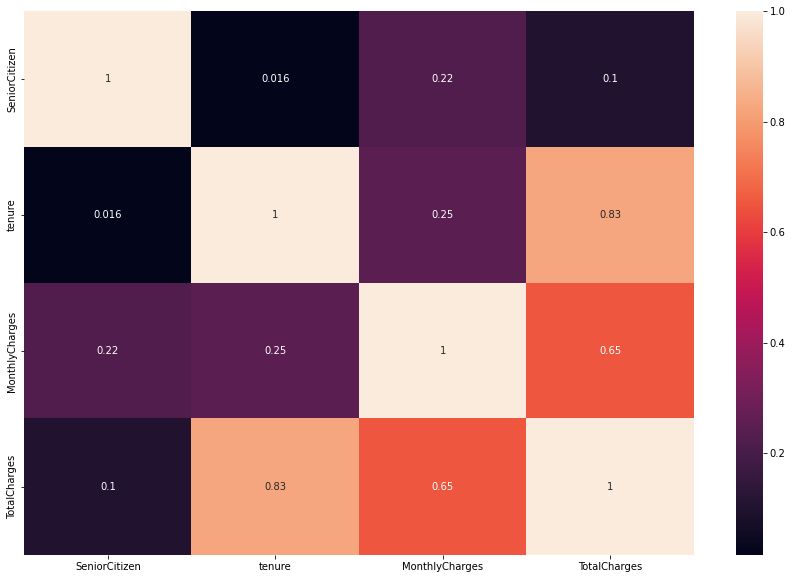

In [24]:
#melihat korelasi numeric antar feature
plt.subplots(figsize=(15, 10))
sns.heatmap(df_new.corr(), annot=True)

- Terdapat korelasi tinggi antara tenure dan TotalCharges sebesar 0.83. Hal ini wajar karena tenure yang lama pastinya memiliki total charges yang lebih besar pula bila ditinjau dari waktunya.
- Terdapat korelasi cukup tinggi antara MonthlyCharges dan TotalCharges sebesar 0.65. Asumsi saya adalah karena memang kedua kolom itu berhubungan. Bila tiap bulannya seorang customer memiliki Monthly Charges yang tinggi, maka TotalCharges juga tinggi. Namun bisa jadi juga jika MonthlyCharges rendah dan customer tersebut tenure nya lama, ia memiliki TotalCharges yang tinggi. Jadi wajar saja jika nilai korelasinya hanya 0.65.
- Berdasarkan hal tersebut, kolom TotalCharges dependent terhadap MonthlyCharges dan Tenure sehingga saya akan menggunakan salah satunya saja untuk pemodelan yaitu MonthlyCharges.

In [25]:
df_new.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 4.3.3. Analisis Chi-Square

#### Churn dan Gender

In [26]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['Churn'],
                            df_new['gender'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new['Churn'].unique()
columns = df_new['gender'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 0.5134128445822852  and p value is: 0.473665182264535
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 0.5134128445822852  and critical value is: 3.841458820694124
Failed to reject the null hypothesis.


berdasarkan perhitungan chi-square test, terdapat kemungkinan gender tidak berkorelasi dengan target.

conclusion : gender tidak dimasukkan sebagai fitur ke model.

#### Churn dan SeniorCitizen

In [27]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['Churn'],
                            df_new['SeniorCitizen'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new['Churn'].unique()
columns = df_new['SeniorCitizen'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 159.36346482495168  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 159.36346482495168  and critical value is: 3.841458820694124
Null Hypothesis is rejected.


berdasarkan perhitungan chi-square test, terdapat kemungkinan SeniorCitizen berkorelasi dengan target.

conclusion : SeniorCitizen dimasukkan sebagai fitur ke model.

#### Churn dan Partner

In [28]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['Churn'],
                            df_new['Partner'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new['Churn'].unique()
columns = df_new['Partner'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 158.1818725853124  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 158.1818725853124  and critical value is: 3.841458820694124
Null Hypothesis is rejected.


berdasarkan perhitungan chi-square test, terdapat kemungkinan Partner berkorelasi dengan target.

conclusion : Partner dimasukkan sebagai fitur ke model ML.

#### Churn dan Dependents

In [29]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['Churn'],
                            df_new['Dependents'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new['Churn'].unique()
columns = df_new['Dependents'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 187.1277625682451  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 187.1277625682451  and critical value is: 3.841458820694124
Null Hypothesis is rejected.


berdasarkan perhitungan chi-square test, terdapat kemungkinan Dependents berkorelasi dengan target.

conclusion : Dependents dimasukkan sebagai fitur ke model.

#### Churn dan tenure

In [30]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['Churn'],
                            df_new['tenure'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new['Churn'].unique()
columns = df_new['tenure'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1060.2925967496433  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1060.2925967496433  and critical value is: 91.67023917605484
Null Hypothesis is rejected.


berdasarkan perhitungan chi-square test, terdapat kemungkinan tenure berkorelasi dengan target.

conclusion : tenure akan dimasukkan sebagai fitur ke model.

#### Churn dan Phone Service

In [31]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['Churn'],
                            df_new['PhoneService'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new['Churn'].unique()
columns = df_new['PhoneService'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 0.9611956938504398  and p value is: 0.32688580734435513
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 0.9611956938504398  and critical value is: 3.841458820694124
Failed to reject the null hypothesis.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi tidak ada korelasi antara Phone Service dengan Churn. Akan tetapi, berdasarkan analisis grafik menunjukkan adanya korelasi yang cukup signifikan

conclusion : PhoneService dimasukkan sebagai fitur ke model.

#### Churn dan Internet Service

In [32]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['Churn'],
                            df_new['InternetService'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new['Churn'].unique()
columns = df_new['InternetService'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 728.6956143058694  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 728.6956143058694  and critical value is: 5.991464547107979
Null Hypothesis is rejected.


berdasarkan perhitungan chi-square test, terdapat kemungkinan Internet Service berkorelasi dengan target.

conclusion : InternetService akan dimasukkan sebagai fitur ke model.

#### Churn dan Contract

In [33]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['Churn'],
                            df_new['Contract'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new['Churn'].unique()
columns = df_new['Contract'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1179.5458287339445  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 1179.5458287339445  and critical value is: 5.991464547107979
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara Contract dan Churn. 

conclusion : Churn dimasukkan sebagai fitur ke model.

#### Churn dan Paperless Billing

In [34]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['Churn'],
                            df_new['PaperlessBilling'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new['Churn'].unique()
columns = df_new['PaperlessBilling'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 257.7562516474757  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 257.7562516474757  and critical value is: 3.841458820694124
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara Paperless Billing dengan Churn. 

conclusion : PaperlessBilling dimasukkan sebagai fitur ke model ML

#### Churn dan Payment Methods

In [35]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['Churn'],
                            df_new['PaymentMethod'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new['Churn'].unique()
columns = df_new['PaymentMethod'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 645.4299001234638  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 645.4299001234638  and critical value is: 7.814727903251179
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara Payment Method dengan Churn. 

conclusion : PaymentMethod dimasukkan sebagai fitur ke model.

#### Churn dan Monthly Charges

In [36]:
# Membuat contingency table
data_crosstab = pd.crosstab(df_new['Churn'],
                            df_new['MonthlyCharges'],
                           margins=True, margins_name="Total")

# Mendefinisikan significance level
alpha = 0.05

# Perhitungan Chisquare
chi_square = 0
rows = df_new['Churn'].unique()
columns = df_new['MonthlyCharges'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Pendekatan dengan p-value
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# Pendekatan dengan critical value
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 2118.854888521665  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 2118.854888521665  and critical value is: 1676.67434388845
Null Hypothesis is rejected.


berdasarkan perhitangan chi-square test, diambil kesimpulan bahwa bisa jadi terdapat korelasi antara Monthly Charges dengan Churn. 

conclusion : MonthlyCharges dimasukkan sebagai fitur ke model

Saya ingin menganalisis lebih lanjut mengenai Monthly Charges.

**Monthly Charges vs Churn**

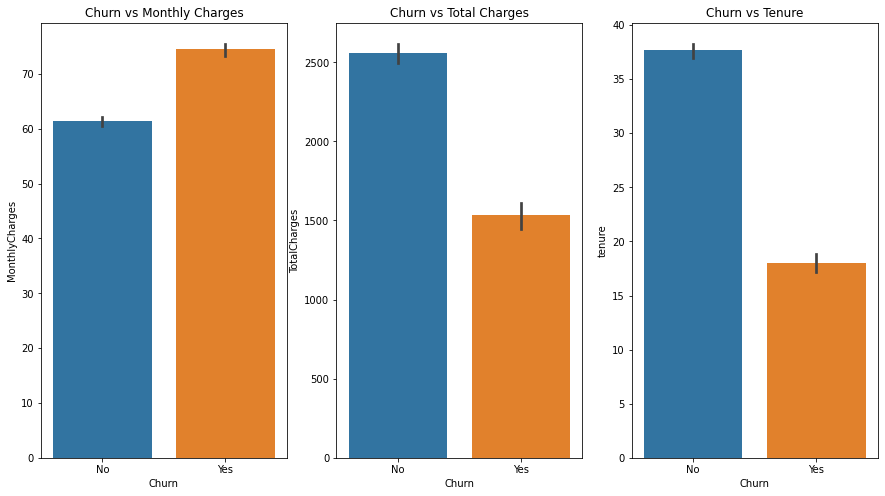

In [37]:
fig, axes = plt.subplots(ncols=3,figsize=(15,8))
sns.barplot(ax=axes[0], x = 'Churn', y = 'MonthlyCharges', data = df_new)
axes[0].set_title("Churn vs Monthly Charges")

sns.barplot(ax=axes[1], x = 'Churn', y = 'TotalCharges', data = df_new)
axes[1].set_title("Churn vs Total Charges")

sns.barplot(ax=axes[2], x = 'Churn', y = 'tenure', data = df_new)
axes[2].set_title("Churn vs Tenure")

plt.show()

- Customer churn memiliki rerata Monthly Charges yang tinggi (>70). Asumsi saya adalah customer churn berhenti berlangganan produk kita karena mungkin monthly charges terlalu mahal untuk mereka. Hal tersebut berdampak juga ke Total Charges dan tenure yang lebih rendah daripada not churn customer.
- Not churn customer memiliki rerata Monthly Charges yang lebih rendah (60). Akan tetapi, asumsi saya adalah customer ini secara konsistent berlangganan dalam waktu yang lama (bisa dilihat di figure Churn vs Tenure) sehingga Total Chargesnya pun lebih besar daripada churn customer.

**Monthly Charges vs Internet Service and Phone Service**

Text(0.5, 1.0, 'Churn vs Phone Service')

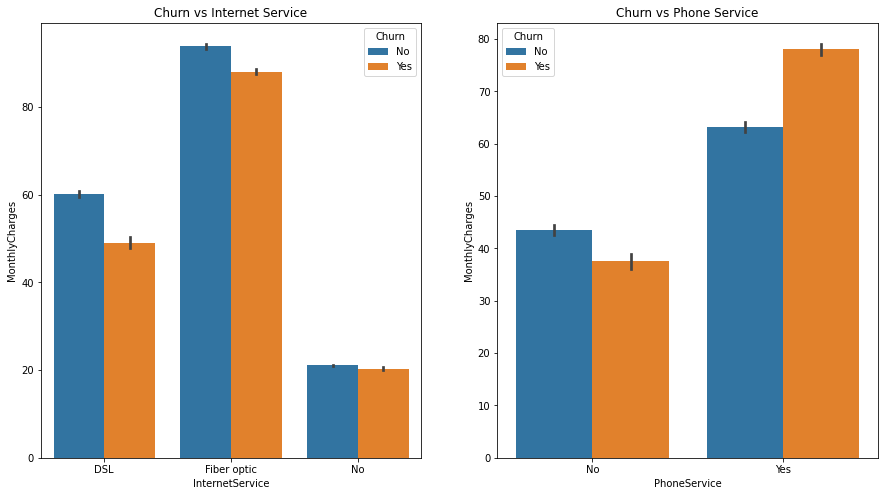

In [38]:
fig, axes = plt.subplots(ncols=2,figsize=(15,8))
sns.barplot(ax=axes[0], x = 'InternetService', y = 'MonthlyCharges', hue='Churn', data = df_new)
axes[0].set_title("Churn vs Internet Service")

sns.barplot(ax=axes[1], x = 'PhoneService', y = 'MonthlyCharges', hue='Churn', data = df_new)
axes[1].set_title("Churn vs Phone Service")

- Customer yang menggunakan Internet Service membayar Monthly Charges lebih mahal.
- Biaya terbesar yang harus dibayar customer untuk layanan Internet adalah Internet Service menggunakan Fiber Optic. Berdasarkan [sumber](https://www.highspeedinternet.com/resources/dsl-vs-fiber), fiber optic lebih mahal daripada DSL. Inilah mengapa customer churn lebih banyak berasal dari customer yang menggunakan fiber optic.
- Customer yang menggunakan Phone Service juga membayar Monthly Charges lebih mahal.

### **fitur yang masuk dalam pemodelan :**

'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod', dan 'MonthlyCharges'

## 4.4. Melihat statistik kolom numerik

In [39]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


Nilai maksimal tenure dan MonthlyCharges terlihat jauh dari nilai reratanya. Akan tetapi hal tersebut adalah kondisi yang wajar karena memang kebutuhan customer berbeda-beda sehingga itu bukanlah suatu outlier.

# V. Data Preprocessing

## 5.1. Drop kolom yang tidak dipakai untuk pemodelan

In [40]:
# menampilkan judul kolom dataset
df_new.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

kolom customerID akan saya drop karena mengandung makna informasi yang sama dengan index dan memiliki cardinality yang tinggi.

selanjutnya kolom selain 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod', dan 'MonthlyCharges' akan didrop karena tidak digunakan pada model.

In [41]:
df_new.shape

(7032, 21)

In [42]:
# menghapus kolom yang tidak digunakan untuk pemodelan
df_new.drop(columns=['customerID', 'gender', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges'], inplace=True)
df_new.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,Yes,DSL,One year,No,Mailed check,56.95,No
2,0,No,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,Yes


In [43]:
df_new['Churn'] = df_new.Churn.replace(('No','Yes'),(0,1), regex=True)

In [44]:
df_new.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,0
1,0,No,No,34,Yes,DSL,One year,No,Mailed check,56.95,0
2,0,No,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,1
3,0,No,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,1


## 5.2. Get data for model inference

In [45]:
# Get data for model inference.
# Data inference tidak boleh ada di train dan test. jadi datanya tuh dibagi buat 3 peruntukan.

data_inf = df_new.sample(10, random_state=9)   # ambil 10 sampel, random state gunanya untuk biar ga berubah2, nilainya 9. Nilainya terserah gada pengaruhnya
data_inf

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
1888,0,No,No,23,Yes,DSL,One year,No,Bank transfer (automatic),55.80,0
5398,0,No,No,2,Yes,No,Month-to-month,No,Mailed check,19.75,0
2622,1,Yes,Yes,28,Yes,DSL,One year,Yes,Electronic check,51.00,0
531,0,Yes,Yes,70,Yes,No,Two year,No,Credit card (automatic),20.05,0
1472,0,Yes,Yes,13,Yes,Fiber optic,Month-to-month,Yes,Credit card (automatic),74.40,1
2035,0,No,Yes,43,Yes,DSL,Month-to-month,Yes,Electronic check,63.95,0
4838,0,Yes,No,67,Yes,Fiber optic,One year,Yes,Credit card (automatic),109.70,0
5505,0,Yes,Yes,12,No,DSL,One year,No,Credit card (automatic),30.25,0
3528,0,No,No,16,Yes,No,Month-to-month,Yes,Mailed check,19.70,1
3279,0,Yes,Yes,23,Yes,DSL,One year,No,Credit card (automatic),57.20,0


In [46]:
# Remove inference-set

data_train_val_test = df_new.drop(data_inf.index)
data_train_val_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No,DSL,Month-to-month,Yes,Electronic check,29.85,0
1,0,No,No,34,Yes,DSL,One year,No,Mailed check,56.95,0
2,0,No,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85,1
3,0,No,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70,1


In [47]:
# Reset index
data_train_val_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,No,No,23,Yes,DSL,One year,No,Bank transfer (automatic),55.80,0
1,0,No,No,2,Yes,No,Month-to-month,No,Mailed check,19.75,0
2,1,Yes,Yes,28,Yes,DSL,One year,Yes,Electronic check,51.00,0
3,0,Yes,Yes,70,Yes,No,Two year,No,Credit card (automatic),20.05,0
4,0,Yes,Yes,13,Yes,Fiber optic,Month-to-month,Yes,Credit card (automatic),74.40,1


## 5.2. Splitting Dataset

In [48]:
# Split between 'X' (features) and 'y' (target)
X = data_train_val_test.drop('Churn', axis = 1)
y = data_train_val_test['Churn']
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,Yes,No,1,No,DSL,Month-to-month,Yes,Electronic check,29.85
1,0,No,No,34,Yes,DSL,One year,No,Mailed check,56.95
2,0,No,No,2,Yes,DSL,Month-to-month,Yes,Mailed check,53.85
3,0,No,No,45,No,DSL,One year,No,Bank transfer (automatic),42.30
4,0,No,No,2,Yes,Fiber optic,Month-to-month,Yes,Electronic check,70.70


In [49]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [50]:
# memisahkan data menjadi train, val, dan test
# dipisahin dulu train sama test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
# train dipisah lagi jadi train dan val. Jadi train ditimpa
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

In [51]:
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
print('Val Size : ', X_val.shape)

Train Size :  (5055, 10)
Test Size :  (703, 10)
Val Size :  (1264, 10)


## 5.3. Outlier Handling

Seperti yang sudah saya jelaskan di EDA bahwa tidak ada yang dianggap outlier di data ini.

## 5.4. Handling Missing Value

Check Missing Values

In [52]:
X_train.isna().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
dtype: int64

In [53]:
X_test.isna().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
dtype: int64

In [54]:
X_val.isna().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
dtype: int64

In [55]:
y_train.isna().sum()

0

In [56]:
y_test.isna().sum()

0

In [57]:
y_val.isna().sum()

0

Tidak ada missing value, lanjut ke proses berikutnya.

## 5.5. Feature Engineering

In [58]:
# mendefinisikan seed agara hasil tidak berubah-ubah
tf.random.set_seed(19)
np.random.seed(19)

In [59]:
X.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


SeniorCitizen     1.830218
tenure            0.237064
MonthlyCharges   -0.223346
dtype: float64

data numerikal (tenure dan MonthlyCharges) berdistrubusi normal (skewness < 0.5) sehingga akan discaleing dengan StandardScaler. Senior Citizen bukan data numerikal, ia adalah categorikal dengan isi numerik.

In [60]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')

### Pipeline Preparation (from Scikit-learn)

In [61]:
# membuat pipeline scaling dan encoding
# encoder menggunakan OneHotEncode untuk semua kolom kategorikal karena tidak ada yang bersifat ordinal.

prepp_pipeline = ColumnTransformer([
    ('normal', Pipeline([
        ('scaler', StandardScaler())
    ]), ['tenure', 'MonthlyCharges']),

    ('cat', Pipeline([
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]), ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']),                      
])

In [62]:
# Applying prep pipeline for the data
X_train_final_prep = prepp_pipeline.fit_transform(X_train)
X_test_final_prep = prepp_pipeline.transform(X_test)
X_val_final_prep = prepp_pipeline.transform(X_val)

In [63]:
X_train_final_prep.shape

(5055, 22)

size outputnya adalah 22 dan akan digunakan untuk input model

### Pipeline Tensorflow

In [64]:
# pipeline tensorflow
data_train = tf.data.Dataset.from_tensor_slices((X_train_final_prep, y_train)).shuffle(10000).batch(50)
data_test = tf.data.Dataset.from_tensor_slices((X_test_final_prep, y_test)).shuffle(10000).batch(50)
data_val = tf.data.Dataset.from_tensor_slices((X_val_final_prep, y_val)).shuffle(10000).batch(50)

# VI. Model Definition

Dataset yang digunakan tidak terlalu besar dan kompleks (hanya 7043 data), maka saya akan mulai pemodelan dengan 2 hidden layer dengan 20 neuron dan 10 neuron

## 6.1. Sequential API

In [65]:
model = tf.keras.models.Sequential() # define model
model.add(tf.keras.layers.Input(shape=(22,)))  # input fitur 22 adalah hasil encoding
model.add(tf.keras.layers.Dense(20))  # hidden layer 1 dengan 20 output
model.add(tf.keras.layers.Dense(10)) # hidden layer 2 dengan 10 output
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # output binary 1 = consist of class 0 and 1. Activation base = sigmoid karena binary classification

## 6.2. Functional API

In [66]:
input = Input(shape=(22,)) 
hl1 = Dense(20, activation='relu')(input)
hl2 = Dense(10, activation='relu')(hl1)
output = Dense(1, activation='sigmoid')(hl2)
concat = keras.layers.concatenate([input, hl2])
modelf = keras.models.Model(inputs=input, outputs=output)

# VII. Model Training 

## 7.1. Sequential

In [67]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),  # saya telah mencoba Adam juga, tapi hasilnya lebih buruk
              metrics='accuracy')

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                460       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


## 7.2. Functional

In [69]:
modelf.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),  # coba optimizernya SGD dan tanpa learning_rate
              metrics='accuracy')

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                460       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


# VIII. Model Evaluation

## 8.1. Evaluation on Sequential Model

In [71]:
history = model.fit(data_train, epochs= 30, validation_data = data_val)

Epoch 1/30
102/102 [==============================] - 2s 10ms/step - loss: 0.5859 - accuracy: 0.6918 - val_loss: 0.5054 - val_accuracy: 0.7571
Epoch 2/30
102/102 [==============================] - 0s 4ms/step - loss: 0.4761 - accuracy: 0.7689 - val_loss: 0.4563 - val_accuracy: 0.7856
Epoch 3/30
102/102 [==============================] - 0s 4ms/step - loss: 0.4498 - accuracy: 0.7808 - val_loss: 0.4403 - val_accuracy: 0.7872
Epoch 4/30
102/102 [==============================] - 0s 4ms/step - loss: 0.4398 - accuracy: 0.7846 - val_loss: 0.4310 - val_accuracy: 0.7911
Epoch 5/30
102/102 [==============================] - 0s 4ms/step - loss: 0.4351 - accuracy: 0.7867 - val_loss: 0.4273 - val_accuracy: 0.7911
Epoch 6/30
102/102 [==============================] - 1s 5ms/step - loss: 0.4324 - accuracy: 0.7909 - val_loss: 0.4249 - val_accuracy: 0.7911
Epoch 7/30
102/102 [==============================] - 0s 5ms/step - loss: 0.4308 - accuracy: 0.7905 - val_loss: 0.4225 - val_accuracy: 0.8070
Epoch

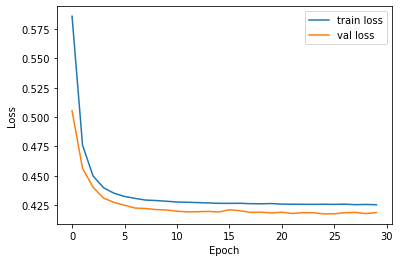

In [72]:
fig, ax = plt.subplots()
ax.plot(range(30),history.history['loss'],label='train loss')
ax.plot(range(30),history.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
# plt.ylim(0,1)
plt.legend()

Base model Sequential :
- Sedikit overfit tapi tidak banyak, hanya berbeda sekitar 0.025 saja.
- Penurunan loss terbesar ditemukan di epoch ke-3

Selanjutnya saya akan melihat classification report base model dengan mengatur threshold 0.5 dan mencari threshold lainnya sehingga didapatkan report yang lebih baik. Konsepnya adalaha karena output dari ANN ini berupa suatu value yang belum didefinisikan kelasnya sehingga perlu threshold agar model tau data mana yang termasuk kelas 0 atau kelas 1. Threshold yang lebih rendah akan membuka probabilitas lebih tinggi data tersebut diidentifikasi sebagai kelas 1. Karena data ini hanya memiliki 22% kelas 1, maka saya akan coba turunkan thresholdnya agar model bisa mengenali kelas 1 dengan lebih baik.

In [73]:
y_preds = model.predict(X_test_final_prep)
y_preds = np.where(y_preds > 0.5, 1, 0)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       513
           1       0.71      0.53      0.60       190

    accuracy                           0.81       703
   macro avg       0.77      0.72      0.74       703
weighted avg       0.80      0.81      0.80       703



In [74]:
y_preds = model.predict(X_test_final_prep)
y_preds = np.where(y_preds > 0.1, 1, 0)  # saya telah mencoba threshold, 0.4, 0.3, 0.2 dan 0.1. Ternyata 0.2 yang terbaik ditinjau dari semua metrics.
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.49      0.65       513
           1       0.41      0.95      0.57       190

    accuracy                           0.61       703
   macro avg       0.68      0.72      0.61       703
weighted avg       0.81      0.61      0.63       703



Saya fokus pada nilai recall kelas 1 (churn). Hal ini penting dalam analisis churn untuk meminimalisir false negative karena saya ingin memprediksi kelas 1 dengan lebih akurat sehingga perusahaan bisa lebih bersiap menghadapi kemungkinan customer akan churn.

**nilai report dengan threshold 0.5**
- F1-score timpang antara kelas 0 dan kelas 1 (berbeda sekitar 28%). Hal tersebut terjadi karena data imbalance sehingga wajar saja dengan threshold 0.5 data kelas 1 nilai reportnya menjadi kurang karena data kelas 1 jumlahnya juga lebih sedikit daripada kelas 0
- Akurasi model bagus sebesar 81%
- Recall kelas 1 masih kecil, hanya 20% saja.

**nilai report dengan threshold 0.1**
- ketimpangan nilai report lebih baik antara kelas 0 dan kelas 1 (hanya berbeda 8%.
- Akurasi model menjadi lebih buruk yaitu hanya 61% saja.
- Recall kelas 1 sudah jauh lebih baik menjadi 95%.
- Walaupun nilai akurasi tidak begitu bagus, namun nilai Recall menujukkan hasil yang baik. Asumsi saya adalah hal tersebut tidak banyak berarti jika hasil evaluasi terhadap inference datanya bagus. Maka akan saya lihat nanti dulu, dan selanjutnya akan saya gunakan threshold 0.1 dalam pemodelan.

## 8.2. Evaluation on Functional Model

In [75]:
historyf = modelf.fit(data_train, epochs= 30, validation_data = data_val)

Epoch 1/30
102/102 [==============================] - 1s 3ms/step - loss: 0.5410 - accuracy: 0.7553 - val_loss: 0.4858 - val_accuracy: 0.7674
Epoch 2/30
102/102 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7771 - val_loss: 0.4588 - val_accuracy: 0.7848
Epoch 3/30
102/102 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7814 - val_loss: 0.4473 - val_accuracy: 0.7872
Epoch 4/30
102/102 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.7844 - val_loss: 0.4416 - val_accuracy: 0.7880
Epoch 5/30
102/102 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.7850 - val_loss: 0.4384 - val_accuracy: 0.7903
Epoch 6/30
102/102 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7850 - val_loss: 0.4352 - val_accuracy: 0.7967
Epoch 7/30
102/102 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.7865 - val_loss: 0.4350 - val_accuracy: 0.7967
Epoch 

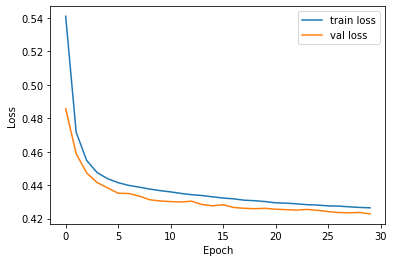

In [76]:
fig, ax = plt.subplots()
ax.plot(range(30),historyf.history['loss'],label='train loss')
ax.plot(range(30),historyf.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
#plt.ylim(0,1)
plt.legend()

Base model Functional :

- Mirip dengan hasil dari model Sequential, sedikit overfit tapi tidak banyak, hanya berbeda sekitar 0.025 saja.
- Penurunan loss terbesar ditemukan di epoch ke-3

In [77]:
y_predf = modelf.predict(X_test_final_prep)
y_predf = np.where(y_predf > 0.5, 1, 0)
print(classification_report(y_test, y_predf))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       513
           1       0.71      0.58      0.64       190

    accuracy                           0.82       703
   macro avg       0.78      0.75      0.76       703
weighted avg       0.82      0.82      0.82       703



In [78]:
y_predf = modelf.predict(X_test_final_prep)
y_predf = np.where(y_predf > 0.1, 1, 0)
print(classification_report(y_test, y_predf))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62       513
           1       0.39      0.93      0.55       190

    accuracy                           0.59       703
   macro avg       0.67      0.70      0.59       703
weighted avg       0.80      0.59      0.60       703



Hasil classification report model Functional mirip dengan model Sequential, hanya berbeda 2% saja di nilai Recall kelas 1 nya.
Karena perbedaannya tidak besar, saya memilih menggunakan model Sequential karena model ini menurut saya lebih praktis selain itu metricsnya juga lebih baik

# IX. Model Improvement

## 9.1. Sequential Model Improvement

In [79]:
models1 = tf.keras.models.Sequential()
#models1.add(tf.keras.layers.Input(shape=(22,)))
models1.add(tf.keras.layers.Dense(20, activation='relu', input_shape=(22,)))   # saya sudah mencoba regulizer l1 dan l2, tapi hasilnya sama saja
models1.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(rate=0.05))  # saya sudah mencoba rate= 0.1 dan 0.05, tapi hasilnya sama saja
#models1.add(LeakyReLU(alpha=0.2))    # saya sudah mencoba alpha 0.1 dan 0.2, tapi hasilnya sama saja
#models1.add(ELU(alpha=0.2))

models1.add(tf.keras.layers.Dense(10, activation='relu'))   # saya sudah mencoba regulizer l1 dan l2, tapi hasilnya sama saja
models1.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(rate=0.05))  # saya sudah mencoba rate= 0.1 dan 0.05, tapi hasilnya sama saja
#models1.add(LeakyReLU(alpha=0.2))    # saya sudah mencoba alpha 0.1 dan 0.2, tapi hasilnya sama saja
#models1.add(ELU(alpha=0.2))

models1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

Saya telah melakukan percobaan dengan menggunakan BatchNormalization, menambahkan dropout, set activation LeakyRelu, set activation ELU, dan mencoba beberapa kernel initializers. Saya juga sudah mencoba set beberapa hidden layer dengan berbagai neuron (100, 120, 130, dan 50). Ternyata hasilnya sama saja, maka saya tidak akan menggunakan ini untuk model.

In [80]:
models1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                460       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 801
Trainable params: 741
Non-trainable 

In [81]:
models1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),  # coba optimizernya SGD dan tanpa learning_rate
              metrics='accuracy')

## 9.2. Evaluation on Improved Sequential Model

In [82]:
historys1 = models1.fit(data_train, epochs= 30, validation_data = data_val)

Epoch 1/30
102/102 [==============================] - 1s 5ms/step - loss: 0.6170 - accuracy: 0.6682 - val_loss: 0.5492 - val_accuracy: 0.7793
Epoch 2/30
102/102 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.7594 - val_loss: 0.4819 - val_accuracy: 0.7872
Epoch 3/30
102/102 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7794 - val_loss: 0.4475 - val_accuracy: 0.7903
Epoch 4/30
102/102 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.7860 - val_loss: 0.4313 - val_accuracy: 0.7967
Epoch 5/30
102/102 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.7972 - val_loss: 0.4242 - val_accuracy: 0.7975
Epoch 6/30
102/102 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.7956 - val_loss: 0.4244 - val_accuracy: 0.7951
Epoch 7/30
102/102 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.7990 - val_loss: 0.4237 - val_accuracy: 0.7991
Epoch 

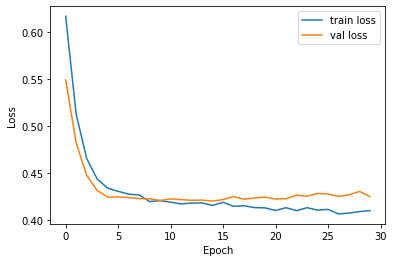

In [83]:
fig, ax = plt.subplots()
ax.plot(range(30),historys1.history['loss'],label='train loss')
ax.plot(range(30),historys1.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
#plt.ylim(0,1)
plt.legend()

In [84]:
y_preds1 = models1.predict(X_test_final_prep)
y_preds1 = np.where(y_preds1 > 0.5, 1, 0)
print(classification_report(y_test, y_preds1))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       513
           1       0.63      0.51      0.56       190

    accuracy                           0.79       703
   macro avg       0.73      0.70      0.71       703
weighted avg       0.77      0.79      0.78       703



In [85]:
y_preds1 = models1.predict(X_test_final_prep)
y_preds1 = np.where(y_preds1 > 0.1, 1, 0)
print(classification_report(y_test, y_preds1))

              precision    recall  f1-score   support

           0       0.97      0.47      0.63       513
           1       0.40      0.96      0.56       190

    accuracy                           0.60       703
   macro avg       0.68      0.71      0.60       703
weighted avg       0.81      0.60      0.61       703



Ternyata setelah dilakukan improvement, nilai metrics juga tidak bertambah dengan signifikan, maka saya akan gunakan base model yang sudah saya definisikan di awal.

# X. Inference

## 9.1. Model Saving

model yang telah disimpan akan diterapkan pada data inference

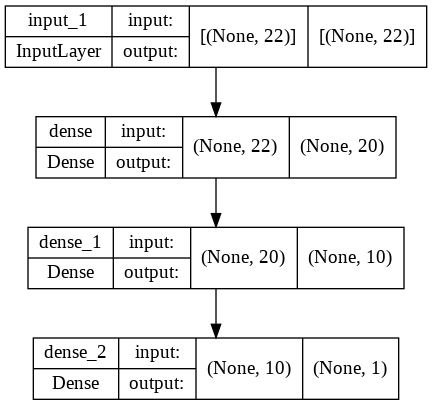

In [86]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

Bagan proses yang terjadi di model yang akan saya simpan dapat dilihat pada plot model di atas. Proses yang terjadi adalah :
1. Input data dengan 22 fitur hasil encoding. (bukan hanya 10 fitur yang dipilih dari proses EDA)
2. Hidden layer 1, dengan 22 input dan 20 output.
3. Hidden layer 2, dengan 20 input dan 10 output.
4. Output, dengan 1 output (karena binary), yang terdiri dari 2 kelas yaitu 0 dan 1

In [87]:
# Model Saving

with open('prep_pipeline.pkl', 'wb') as file_1:  # nama file, wb write binary, as aliasnya
  pickle.dump(prepp_pipeline, file_1)  # masukin yang fit dan aliasnya


model.save('churn_predictor.h5')

In [88]:
# Load All Models

with open('prep_pipeline.pkl', 'rb') as file_1:
  prepp_pipeline = pickle.load(file_1)


churn_predictor = keras.models.load_model('churn_predictor.h5')

## 9.2. Preprocessing inference data

In [89]:
data_inf

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,No,No,23,Yes,DSL,One year,No,Bank transfer (automatic),55.80,0
1,0,No,No,2,Yes,No,Month-to-month,No,Mailed check,19.75,0
2,1,Yes,Yes,28,Yes,DSL,One year,Yes,Electronic check,51.00,0
3,0,Yes,Yes,70,Yes,No,Two year,No,Credit card (automatic),20.05,0
4,0,Yes,Yes,13,Yes,Fiber optic,Month-to-month,Yes,Credit card (automatic),74.40,1
5,0,No,Yes,43,Yes,DSL,Month-to-month,Yes,Electronic check,63.95,0
6,0,Yes,No,67,Yes,Fiber optic,One year,Yes,Credit card (automatic),109.70,0
7,0,Yes,Yes,12,No,DSL,One year,No,Credit card (automatic),30.25,0
8,0,No,No,16,Yes,No,Month-to-month,Yes,Mailed check,19.70,1
9,0,Yes,Yes,23,Yes,DSL,One year,No,Credit card (automatic),57.20,0


In [90]:
data_inf.isna().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [91]:
data_inf_final = prepp_pipeline.transform(data_inf)

## 9.3. Inference Model

In [92]:
y_pred_inf = churn_predictor.predict(data_inf_final)
y_pred_inf = np.where(y_pred_inf > 0.1, 1, 0)

In [93]:
# Convert into DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Customer Churn - Prediction'])
y_pred_inf_df

,Customer Churn - Prediction
0,0
1,1
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,0


In [94]:
data_inf['Churn']

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    0
8    1
9    0
Name: Churn, dtype: int64

Jika dibandingkan dengan target data asli, hasil prediksi data inference sudah 60% benar. Hanya ada 4 kesalahan di index row [1], [2], [5], dan [7] yaitu pada data asli adalah besok hujan (1) akan tetapi hasil prediksi inference adalah besok tidak hujan (0). Dari asumsi saya, hal ini disebabkan karena ini merupakan efek dari threshold yang telah ditetapkan (0.1) yang meminimalkan false negative dengan konsekuensi false positve meningkat. Hasil tersebut juga menunjukkan bahwa dari data yang terprediksi 0, semuanya memang benar 0 dan itu menurut saya sudah bagus. Selain itu disebabkan pula karena kurangnya eksplorasi terhadap model improvement karena keterbatasan waktu yang saya miliki.

# XI. Kesimpulan

**Metrics Model**
- Model Sequential dan Functional menghasilkan metrics yang sangat mirip. Saya memilih Sequential karena menurut saya lebih praktis.
- Hasil metrics dengan threshold 0.1 memiliki nilai Recall yang lebih baik daripada threshold 0.5. Akan tetapi akurasi threshold 0.1 lebih buruk (hanya 74%) dibandingkan threshold 0.5 (mencapai 82%). Itu tidak masalah karena memang tujuannya menaikkan nilai Recall.
- Model Improvement tidak berpengaruh dalam meningkatkan kualitas metrics model. Model improvement yang telah dicoba : kernel initializer, Batch normalization, menambah regulizer, mencoba activation function leaky relu dan ELU.
- Akurasi pada data inference hanya sebesar 60% dengan semua kesalahannya adalah salah memprediksi kelas 0 menjadi kelas 1. Ini merupakan efek dari threshold yang telah ditetapkan (0.1) yang meminimalkan false negative dengan konsekuensi false positve meningkat.
- Tujuan telah tercapai dimana tidak ada false negative dari evaluasi terhadap data inference dan itu merupakan hal yang lebih baik bagi perusahaan karena saya tidak ingin perusahaan kurang persiapan dalam menghadapi kemungkinan customer churn yang dapat merugikan perusahaan itu sendiri.


**Analisis kelebihan dan kelemahan tiap model**
- Model with Sequential API : memiliki kelebihan lebih praktis untuk digunakan karena secara otomatis prosesnya berjalan seperti chain/rantai. Selain itu tidak perlu mendefinisikan variabel untuk setiap prosesnya. Maka dari itu sequential cocok untuk dataset ini yang hanya perlu 1 jenis input. Akan tetapi kelemahannya adalah jika diperlukan >1 input, sequential tidak bisa mengakomodasi hal tersebut.
- Model wit Functional API : memiliki kelebihan fleksibel untuk multi-input. kelemahannya adalah kurang praktis untuk model/dataset yang sederhana karena perlu pendefinisian variabel sehingga saat model improvement pastinya akan lebih memakan waktu dan tenaga hanya untuk assign ke variabel saja.

**Improvement Suggestion**
- Improvement yang dapat diterapkan untuk ANN ini adalah pada model improvement agar bisa dieksplor lebih banyak lagi komponen-komponen improvementnya sehingga menghasilkan model yang lebih bagus lagi.


**Insight setelah proses EDA dan selanjutnya**
- dari analisis grafik, chi-square test, dan personal judgement di EDA, kolom yang terpilih sebagai fitur sudah cukup baik dalam memprediksi data karena akurasinya mencapai 74% untuk model evaluasi dan 60% untuk data inference.
- proses yang ingin saya highlight adalah penentuan threshold. Ternyata proses tersebut sangat penting dalam menentukan output dan juga terkait Recall yang sudah saya jelaskan di atas.